In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#df = pd.read_csv('/Users/tianyunt/sampled_loans.csv')

In [2]:
df = pd.read_csv('/Users/tianyunt/sampled loan(dist).csv')
df.head()

,Unnamed: 0,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,PURPOSE,MSA,CSCORE_B,DLQ_STATUS,DTI,MOD_FLAG,TR_PREV
0,78177133,97473385,2019-07-01,92625.00,93000.0,-1.0,360.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,NaN
1,78177134,97473385,2019-08-01,92625.00,93000.0,0.0,360.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0
2,78177135,97473385,2019-09-01,92344.53,93000.0,1.0,358.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0
3,78177136,97473385,2019-10-01,92344.53,93000.0,2.0,358.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0
4,78177137,97473385,2019-11-01,91572.09,93000.0,3.0,353.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,PURPOSE,MSA,CSCORE_B,DLQ_STATUS,DTI,MOD_FLAG,TR_PREV
0,97473385,2019-07-01,92625.00,93000.0,-1.0,360.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,NaN
1,97473385,2019-08-01,92625.00,93000.0,0.0,360.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0
2,97473385,2019-09-01,92344.53,93000.0,1.0,358.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0
3,97473385,2019-10-01,92344.53,93000.0,2.0,358.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0
4,97473385,2019-11-01,91572.09,93000.0,3.0,353.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0


In [32]:
df['DLQ_STATUS'].value_counts()

DLQ_STATUS
 0    79424219
 1     1175535
 6      760965
-1      607750
 2      351524
 3      174660
 4      124038
 5      101875
Name: count, dtype: int64

In [4]:
df.describe()

,LOAN_ID,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,MSA,CSCORE_B,DLQ_STATUS,DTI,TR_PREV
count,8.272057e+07,8.272056e+07,8.272057e+07,8.210773e+07,7.973807e+07,8.272057e+07,8.210894e+07,8.272057e+07,8.271930e+07,8.272057e+07,8.254629e+07,8.272057e+07,8.155670e+07,8.169979e+07
mean,5.193983e+11,1.520576e+05,1.916800e+05,5.434220e+01,2.462771e+02,4.617011e+00,4.558704e+00,6.969107e+01,7.060617e+01,2.722404e+04,7.472953e+02,8.904835e-02,3.377898e+01,9.617295e-02
std,2.820616e+11,1.110585e+05,1.118866e+05,4.243992e+01,9.582910e+01,1.117253e+00,1.112048e+00,1.751529e+01,1.760036e+01,1.414039e+04,5.372188e+01,6.599865e-01,1.113939e+01,6.514135e-01
min,9.747338e+07,0.000000e+00,7.000000e+03,-1.000000e+00,0.000000e+00,1.750000e+00,1.750000e+00,2.000000e+00,2.000000e+00,0.000000e+00,3.810000e+02,-1.000000e+00,0.000000e+00,0.000000e+00
25%,2.851229e+11,7.270961e+04,1.080000e+05,2.000000e+01,1.650000e+02,3.750000e+00,3.750000e+00,6.000000e+01,6.000000e+01,1.698000e+04,7.120000e+02,0.000000e+00,2.600000e+01,0.000000e+00
50%,5.231249e+11,1.294153e+05,1.650000e+05,4.500000e+01,2.800000e+02,4.500000e+00,4.375000e+00,7.500000e+01,7.500000e+01,3.108000e+04,7.610000e+02,0.000000e+00,3.400000e+01,0.000000e+00
75%,7.617216e+11,2.111780e+05,2.520000e+05,7.900000e+01,3.290000e+02,5.500000e+00,5.500000e+00,8.000000e+01,8.000000e+01,3.890000e+04,7.910000e+02,0.000000e+00,4.200000e+01,0.000000e+00
max,9.999999e+11,1.261820e+06,1.271000e+06,2.830000e+02,4.800000e+02,9.000000e+00,9.000000e+00,9.700000e+01,1.750000e+02,4.974000e+04,8.500000e+02,6.000000e+00,6.400000e+01,6.000000e+00


In [5]:
df['ACT_PERIOD'] = pd.to_datetime(df['ACT_PERIOD'])
df['YEAR'] = df['ACT_PERIOD'].dt.year
df.head()

,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,PURPOSE,MSA,CSCORE_B,DLQ_STATUS,DTI,MOD_FLAG,TR_PREV,YEAR
0,97473385,2019-07-01,92625.00,93000.0,-1.0,360.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,NaN,2019
1,97473385,2019-08-01,92625.00,93000.0,0.0,360.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0,2019
2,97473385,2019-09-01,92344.53,93000.0,1.0,358.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0,2019
3,97473385,2019-10-01,92344.53,93000.0,2.0,358.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0,2019
4,97473385,2019-11-01,91572.09,93000.0,3.0,353.0,3.75,3.75,95.0,95.0,P,24580,770.0,0,31.0,N,0.0,2019


In [27]:
#ACT PER
#04-07, 08-10, 11-19, 20-22
#loan id in different periods
#default rate(deliquency status >= 06)  of loans in different periods 

# Defining the period ranges
periods = {
    '04-07': (2004, 2007),
    '08-10': (2008, 2010),
    '11-19': (2011, 2019),
    '20-22': (2020, 2022)
}

# Creating separate DataFrames for each period
dfs = {}
for period, (start_year, end_year) in periods.items():
    dfs[period] = df[df['YEAR'].between(start_year, end_year)]

# Displaying the first few rows of each DataFrame
for period, df_period in dfs.items():
    print(f"DataFrame for period {period}:")
    print(df_period.head(), '\n')

DataFrame for period 04-07:
              LOAN_ID ACT_PERIOD  CURRENT_UPB  ORIG_UPB  LOAN_AGE  \
4563497  100007394753 2004-05-01          0.0  143000.0       1.0   
4563498  100007394753 2004-06-01          0.0  143000.0       2.0   
4563499  100007394753 2004-07-01          0.0  143000.0       3.0   
4563500  100007394753 2004-08-01          0.0  143000.0       4.0   
4563501  100007394753 2004-09-01          0.0  143000.0       5.0   

         ADJ_REM_MONTHS  ORIG_RATE  CURR_RATE  OLTV  OCLTV PURPOSE    MSA  \
4563497           359.0        5.5        5.5  80.0   80.0       P  38060   
4563498           358.0        5.5        5.5  80.0   80.0       P  38060   
4563499           356.0        5.5        5.5  80.0   80.0       P  38060   
4563500           355.0        5.5        5.5  80.0   80.0       P  38060   
4563501           354.0        5.5        5.5  80.0   80.0       P  38060   

         CSCORE_B  DLQ_STATUS   DTI MOD_FLAG  TR_PREV  YEAR  
4563497     772.0           0  2

In [29]:
# Counting the number of defaults ('DLQ_STATUS' == 6) in each period
default_counts = {}
for period, df_period in dfs.items():
    default_counts[period] = (df_period['DLQ_STATUS'] == 6).sum()

# Calculating default rates for each period
# Default rate is calculated as the number of defaults divided by the total number of records in the period
default_rates = {period: defaults / len(df_period) if len(df_period) > 0 else 0 for period, defaults in default_counts.items()}

default_counts, default_rates

({'04-07': 3645, '08-10': 124232, '11-19': 437286, '20-22': 185529},
 {'04-07': 0.00022005267258045898,
  '08-10': 0.007500022941019363,
  '11-19': 0.026399438403845978,
  '20-22': 0.01120059047768998})

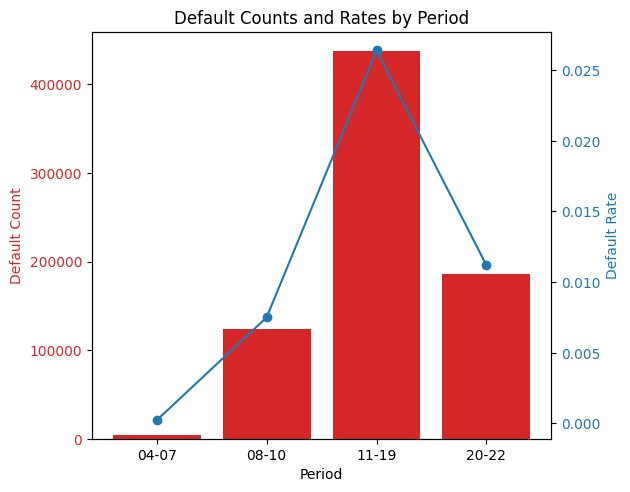

In [39]:
# Converting the data into lists for plotting
periods = list(default_counts.keys())
count_values = list(default_counts.values())
rate_values = list(default_rates.values())

# Creating the plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('Default Count', color=color)
ax1.bar(periods, count_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Default Rate', color=color)
ax2.plot(periods, rate_values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Default Counts and Rates by Period')
plt.show()

In [35]:
df1 = dfs['04-07'].copy()
df2 = dfs['08-10'].copy()
df3 = dfs['11-19'].copy()
df4 = dfs['20-22'].copy()

In [36]:
df1

,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,PURPOSE,MSA,CSCORE_B,DLQ_STATUS,DTI,MOD_FLAG,TR_PREV,YEAR
4563497,100007394753,2004-05-01,0.00,143000.0,1.0,359.0,5.500,5.500,80.0,80.0,P,38060,772.0,0,26.0,N,NaN,2004
4563498,100007394753,2004-06-01,0.00,143000.0,2.0,358.0,5.500,5.500,80.0,80.0,P,38060,772.0,0,26.0,N,0.0,2004
4563499,100007394753,2004-07-01,0.00,143000.0,3.0,356.0,5.500,5.500,80.0,80.0,P,38060,772.0,0,26.0,N,0.0,2004
4563500,100007394753,2004-08-01,0.00,143000.0,4.0,355.0,5.500,5.500,80.0,80.0,P,38060,772.0,0,26.0,N,0.0,2004
4563501,100007394753,2004-09-01,0.00,143000.0,5.0,354.0,5.500,5.500,80.0,80.0,P,38060,772.0,0,26.0,N,0.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82720051,999996197450,2007-08-01,116263.92,120000.0,30.0,330.0,5.625,5.625,80.0,80.0,P,19100,647.0,0,38.0,N,0.0,2007
82720052,999996197450,2007-09-01,116115.81,120000.0,31.0,329.0,5.625,5.625,80.0,80.0,P,19100,647.0,0,38.0,N,0.0,2007
82720053,999996197450,2007-10-01,115967.00,120000.0,32.0,328.0,5.625,5.625,80.0,80.0,P,19100,647.0,0,38.0,N,0.0,2007
82720054,999996197450,2007-11-01,115817.50,120000.0,33.0,327.0,5.625,5.625,80.0,80.0,P,19100,647.0,0,38.0,N,0.0,2007


In [37]:
#CSCORE_B 
#0-700, 700-760, 760-790, 790+

# Creating four dummy variables for the credit score categories
credit_score_bins = [0, 700, 760, 790, float('inf')]
credit_score_labels = ['0-700', '700-760', '760-790', '790+']

# Using pandas cut to categorize and then get_dummies to create dummy variables
df1['CSCORE_CAT'] = pd.cut(df1['CSCORE_B'], bins=credit_score_bins, labels=credit_score_labels, right=False)
credit_score_dummies = pd.get_dummies(df1['CSCORE_CAT'], prefix='CSCORE').astype(int)

df1_w_score_dum = pd.concat([df1, credit_score_dummies], axis=1)
df1_w_score_dum.head()

#do the same things for df2,df3,df4

,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,...,DLQ_STATUS,DTI,MOD_FLAG,TR_PREV,YEAR,CSCORE_CAT,CSCORE_0-700,CSCORE_700-760,CSCORE_760-790,CSCORE_790+
4563497,100007394753,2004-05-01,0.0,143000.0,1.0,359.0,5.5,5.5,80.0,80.0,...,0,26.0,N,NaN,2004,760-790,0,0,1,0
4563498,100007394753,2004-06-01,0.0,143000.0,2.0,358.0,5.5,5.5,80.0,80.0,...,0,26.0,N,0.0,2004,760-790,0,0,1,0
4563499,100007394753,2004-07-01,0.0,143000.0,3.0,356.0,5.5,5.5,80.0,80.0,...,0,26.0,N,0.0,2004,760-790,0,0,1,0
4563500,100007394753,2004-08-01,0.0,143000.0,4.0,355.0,5.5,5.5,80.0,80.0,...,0,26.0,N,0.0,2004,760-790,0,0,1,0
4563501,100007394753,2004-09-01,0.0,143000.0,5.0,354.0,5.5,5.5,80.0,80.0,...,0,26.0,N,0.0,2004,760-790,0,0,1,0


In [40]:
#CURR_RATE
rate_bins = [0, 3.75, 4.5, 5.5, float('inf')]
rate_labels = ['0-3.75', '3.75-4.5', '4.5-5.5', '5.5+']

# Using pandas cut to categorize and then get_dummies to create dummy variables
df1['RATE_CAT'] = pd.cut(df1['CURR_RATE'], bins=rate_bins, labels=rate_labels, right=False)
rate_dummies = pd.get_dummies(df1['RATE_CAT'], prefix='RATE').astype(int)

df1_w_rate_dum = pd.concat([df1, rate_dummies], axis=1)
df1_w_rate_dum.head()

#do the same things for df2,df3,df4

,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,...,DTI,MOD_FLAG,TR_PREV,YEAR,CSCORE_CAT,RATE_CAT,RATE_0-3.75,RATE_3.75-4.5,RATE_4.5-5.5,RATE_5.5+
4563497,100007394753,2004-05-01,0.0,143000.0,1.0,359.0,5.5,5.5,80.0,80.0,...,26.0,N,NaN,2004,760-790,5.5+,0,0,0,1
4563498,100007394753,2004-06-01,0.0,143000.0,2.0,358.0,5.5,5.5,80.0,80.0,...,26.0,N,0.0,2004,760-790,5.5+,0,0,0,1
4563499,100007394753,2004-07-01,0.0,143000.0,3.0,356.0,5.5,5.5,80.0,80.0,...,26.0,N,0.0,2004,760-790,5.5+,0,0,0,1
4563500,100007394753,2004-08-01,0.0,143000.0,4.0,355.0,5.5,5.5,80.0,80.0,...,26.0,N,0.0,2004,760-790,5.5+,0,0,0,1
4563501,100007394753,2004-09-01,0.0,143000.0,5.0,354.0,5.5,5.5,80.0,80.0,...,26.0,N,0.0,2004,760-790,5.5+,0,0,0,1


In [41]:
#LOAN_AGE
age_bins = [0, 20, 50, 80, float('inf')]
age_labels = ['0-20', '20-50', '50-80', '80+']

df1['AGE_CAT'] = pd.cut(df1['LOAN_AGE'], bins=age_bins, labels=age_labels, right=False)
age_dummies = pd.get_dummies(df1['AGE_CAT'], prefix='AGE').astype(int)

df1_w_age_dum = pd.concat([df1, age_dummies], axis=1)
df1_w_age_dum.head()

#do the same things for df2,df3,df4

,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,...,MOD_FLAG,TR_PREV,YEAR,CSCORE_CAT,RATE_CAT,AGE_CAT,AGE_0-20,AGE_20-50,AGE_50-80,AGE_80+
4563497,100007394753,2004-05-01,0.0,143000.0,1.0,359.0,5.5,5.5,80.0,80.0,...,N,NaN,2004,760-790,5.5+,0-20,1,0,0,0
4563498,100007394753,2004-06-01,0.0,143000.0,2.0,358.0,5.5,5.5,80.0,80.0,...,N,0.0,2004,760-790,5.5+,0-20,1,0,0,0
4563499,100007394753,2004-07-01,0.0,143000.0,3.0,356.0,5.5,5.5,80.0,80.0,...,N,0.0,2004,760-790,5.5+,0-20,1,0,0,0
4563500,100007394753,2004-08-01,0.0,143000.0,4.0,355.0,5.5,5.5,80.0,80.0,...,N,0.0,2004,760-790,5.5+,0-20,1,0,0,0
4563501,100007394753,2004-09-01,0.0,143000.0,5.0,354.0,5.5,5.5,80.0,80.0,...,N,0.0,2004,760-790,5.5+,0-20,1,0,0,0


In [42]:
df1

,LOAN_ID,ACT_PERIOD,CURRENT_UPB,ORIG_UPB,LOAN_AGE,ADJ_REM_MONTHS,ORIG_RATE,CURR_RATE,OLTV,OCLTV,...,MSA,CSCORE_B,DLQ_STATUS,DTI,MOD_FLAG,TR_PREV,YEAR,CSCORE_CAT,RATE_CAT,AGE_CAT
4563497,100007394753,2004-05-01,0.00,143000.0,1.0,359.0,5.500,5.500,80.0,80.0,...,38060,772.0,0,26.0,N,NaN,2004,760-790,5.5+,0-20
4563498,100007394753,2004-06-01,0.00,143000.0,2.0,358.0,5.500,5.500,80.0,80.0,...,38060,772.0,0,26.0,N,0.0,2004,760-790,5.5+,0-20
4563499,100007394753,2004-07-01,0.00,143000.0,3.0,356.0,5.500,5.500,80.0,80.0,...,38060,772.0,0,26.0,N,0.0,2004,760-790,5.5+,0-20
4563500,100007394753,2004-08-01,0.00,143000.0,4.0,355.0,5.500,5.500,80.0,80.0,...,38060,772.0,0,26.0,N,0.0,2004,760-790,5.5+,0-20
4563501,100007394753,2004-09-01,0.00,143000.0,5.0,354.0,5.500,5.500,80.0,80.0,...,38060,772.0,0,26.0,N,0.0,2004,760-790,5.5+,0-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82720051,999996197450,2007-08-01,116263.92,120000.0,30.0,330.0,5.625,5.625,80.0,80.0,...,19100,647.0,0,38.0,N,0.0,2007,0-700,5.5+,20-50
82720052,999996197450,2007-09-01,116115.81,120000.0,31.0,329.0,5.625,5.625,80.0,80.0,...,19100,647.0,0,38.0,N,0.0,2007,0-700,5.5+,20-50
82720053,999996197450,2007-10-01,115967.00,120000.0,32.0,328.0,5.625,5.625,80.0,80.0,...,19100,647.0,0,38.0,N,0.0,2007,0-700,5.5+,20-50
82720054,999996197450,2007-11-01,115817.50,120000.0,33.0,327.0,5.625,5.625,80.0,80.0,...,19100,647.0,0,38.0,N,0.0,2007,0-700,5.5+,20-50


              LOAN_ID ACT_PERIOD  CURRENT_UPB  ORIG_UPB  LOAN_AGE  \
4563521  100007394753 2006-05-01          0.0  143000.0       NaN   
4579117  100187887702 2007-05-01          0.0   50000.0       NaN   
4580623  100210823034 2007-02-01          0.0  333000.0       NaN   
4581232  100222196692 2006-05-01          0.0   40000.0       NaN   
4586392  100274850840 2006-07-01          0.0  161000.0       NaN   

         ADJ_REM_MONTHS  ORIG_RATE  CURR_RATE  OLTV  OCLTV  ...    MSA  \
4563521             NaN      5.500        NaN  80.0   80.0  ...  38060   
4579117             NaN      5.750        NaN  61.0   61.0  ...  22520   
4580623             NaN      5.750        NaN  67.0   67.0  ...  31100   
4581232             NaN      5.625        NaN  68.0   68.0  ...  22520   
4586392             NaN      6.125        NaN  70.0   70.0  ...  44700   

         CSCORE_B  DLQ_STATUS   DTI  MOD_FLAG TR_PREV  YEAR  CSCORE_CAT  \
4563521     772.0          -1  26.0       NaN     0.0  2006     7

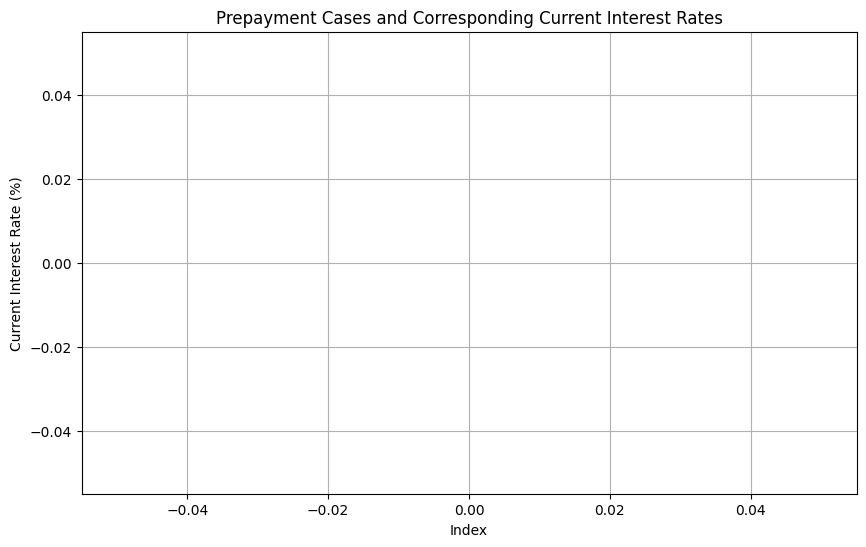

In [59]:
#prepayment & current rate 
prepayment_df = df1[df1['DLQ_STATUS'] == -1]
print(prepayment_df.head())
# Extracting current interest rates for prepayment cases
current_interest_rates_prepayment = prepayment_df['CURR_RATE']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(current_interest_rates_prepayment.index, current_interest_rates_prepayment, alpha=0.7)
plt.title('Prepayment Cases and Corresponding Current Interest Rates')
plt.xlabel('Index')
plt.ylabel('Current Interest Rate (%)')
plt.grid(True)
plt.show()